# 章 プロットと可視化
- 可視化はデータ探索プロセスの一部
- 可視化を行う事で異常値やデータ変形の必要性を認識しやすくなる。

## Matplotlib APIの概要
-  __`import matplotlib.pyplot as plt`__とインポートするのが慣例。  
 (Jupyterの場合は `%matplotlib inline` も必要）

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

plt.rc('figure', figsize=(10, 6))
np.set_printoptions(precision=4, suppress=True)

In [2]:
data = np.arange(10)
data

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

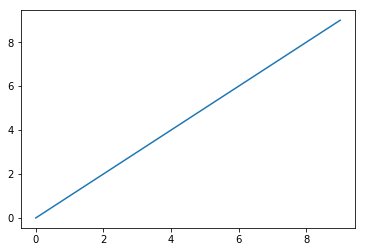

In [3]:
 plt.plot(data)

### 図とサブプロット
p279
- __`plt.figure`__で、プロットする為の描画領域を作成する。
- 描画領域を作成しただけでは、図は作成されない。
- 描画するにはサブプロットを作成する必要がある。
- サブプロットは、描画領域に __`add_subplot`__ で割り当てる。

p280
- Jupyter上では、セルが変わる毎にプロットはリセットされる。

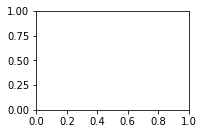

In [4]:
fig = plt.figure()

# キャンパス上に２×２の描画領域を作成s、１番目（左上）にax1を割り当てる。
ax1 = fig.add_subplot(2, 2, 1)

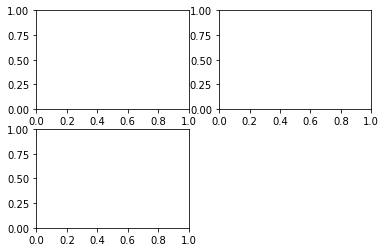

In [5]:
fig = plt.figure()

ax1 = fig.add_subplot(2, 2, 1)
ax2 = fig.add_subplot(2, 2, 2)
ax3 = fig.add_subplot(2, 2, 3)

p280
- __`plt.plot`__ で描画する。
- 描画対象は最後に使用したサブプロット（キャンパス）。
- サブプロットが存在しない場合は、新規に作成する。

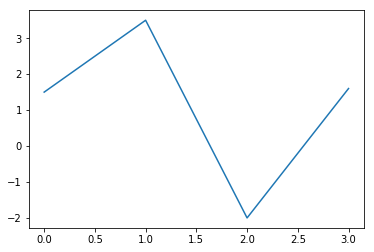

In [6]:
plt.plot([1.5, 3.5, -2, 1.6])

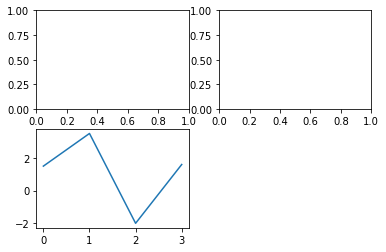

In [7]:
fig = plt.figure()

ax1 = fig.add_subplot(2, 2, 1)
ax2 = fig.add_subplot(2, 2, 2)
ax3 = fig.add_subplot(2, 2, 3)

# 直近のサブプロットであるax3に描画                      
plt.plot([1.5, 3.5, -2, 1.6])

p281
- __`fig.add_subplot`__ で作成された __AxesSubplotオブジェクト__ にデータやオプションを指定する事で直接プロット可能。

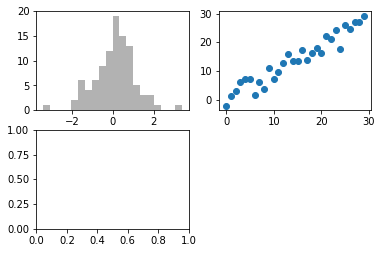

In [8]:
fig = plt.figure()

ax1 = fig.add_subplot(2, 2, 1)
ax2 = fig.add_subplot(2, 2, 2)
ax3 = fig.add_subplot(2, 2, 3)

ax1.hist(np.random.randn(100) , bins =20, color='k', alpha=0.3)
ax2.scatter(np.arange(30), np.arange(30) + 3 * np.random.randn(30))

p281
- __`fig.subplots`__ で figure と subplot を作成する。

p282
- sharex,shareyで全てのサププロットに同じX軸とY軸を設定することが可能。
- __`subplot_kw`__ で add_subplot に渡されるキーワード引数のディクショナリを指定できる。
- __`**fig_kw`__ で subplots に与える作図の際に用いる追加キーワード引数を指定できる。

### fig  Figure(432x288)
### axe  [[<matplotlib.axes._subplots.AxesSubplot object at 0x10b29d550>


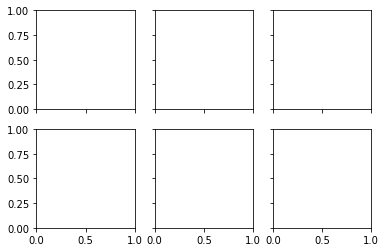

In [9]:
# 2×3 のfigureと サブプロット axe を作成
fig = None

# 位置引数を使用すれば、nrows等の宣言は不要。
fig, axe = plt.subplots(nrows=2, ncols=3, sharex=True, sharey=True)

# 上記と同じ意味
# fig, axe = plt.subplots(2, 3, True, True)

# 描画は最後に評価される。
print("### fig ", fig)
print("### axe ", axe)

p283
- Matplotlib のデフォルトではサブプロットのまわりにかなりの余白ができる。
- スペースの調節は、Figure オブジェクトの __`subplots_ adjust`__ メソッドを使います。
- このメソッドはトップレベルの関数としても使える。


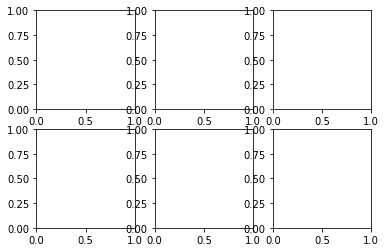

In [10]:
fig, axe = plt.subplots(2, 3)
fig.subplots_adjust(
    left=None, bottom=None, right=None, top=None, wspace=None, hspace=None)

# トップレベルの関数として、下記の書き方でもOK
# plt.subplots_adjust(
#     left=None, bottom=None, right=None, top=None, wspace=None, hspace=None)


### 色、マーカー、線種

p285
- Jupyter上では __`plt.plot?`__で線種や色の指定方法を確認できる。
- __`plt.legend`__ で 凡例を表示できる。

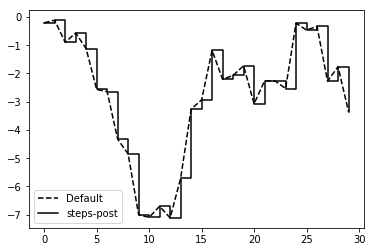

In [11]:
data = np.random.randn(30).cumsum()

# drawstyleのデフォルト
plt.plot(data, 'k--', label='Default')

# drawstyleを指定
plt.plot(data, 'k-', drawstyle='steps-post', label='steps-post')

# 凡例を表示（labelが使用される）
plt.legend(loc="best")

### 目盛り、ラベル、凡例


p286
- プロットの装飾には__`matplotlib.pyplot`__インタフェースを使う方法と、オブジェクト指向なインスタンスメソッドを使用する２種類がある。
- matplotlib.pyplotインタフェースの場合、__`xlim`__、__`xticks`__、__`xticklabels`__でプロット範囲、目盛りの位置、目盛りのラベルを指定できる。

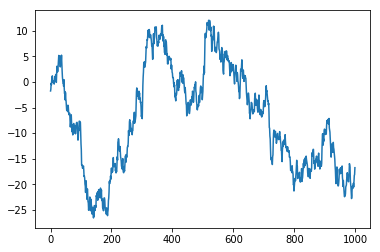

In [12]:
np.random.seed(100) 

# デフォルト
fig, ax = plt.subplots(1, 1)
ax.plot(np.random.randn(1000, ).cumsum())

([<matplotlib.axis.XTick at 0x11084fa58>,
 <a list of 4 Text xticklabel objects>)

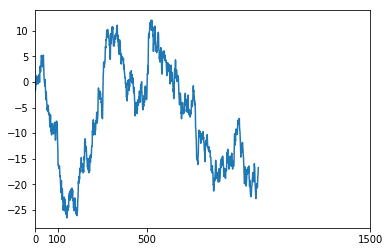

In [13]:
np.random.seed(100) 

# matplotlib.pyplotインタフェース
fig, ax = plt.subplots(1, 1)
ax.plot(np.random.randn(1000).cumsum())

# X軸の目盛りを 0−1500 に指定
plt.xlim(0, 1500)

# X軸の目盛りの位置を指定
plt.xticks([0, 100, 500, 1500])

# AttributeError: module 'matplotlib.pyplot' has no attribute 'xticklabels'　が発生する
# plt.xticklabels(["zero", "100", "500", "1,500"])

Text(0.5,1,'### matplotlib plot test ###')

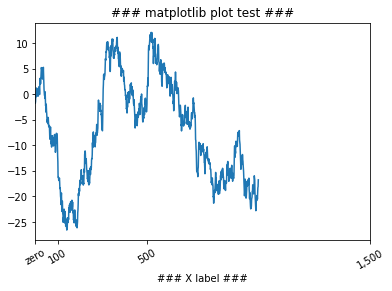

In [14]:
np.random.seed(100) 

# オブジェクト指向の設定
fig, ax = plt.subplots(1, 1)
ax.plot(np.random.randn(1000).cumsum())

ax.set_xlim(0, 1500)

# X軸の目盛りの位置を指定
ax.set_xticks([0, 100, 500, 1500])

# 目盛りのラベルを指定し、30度回転させて表示
ax.set_xticklabels(["zero", "100", "500", "1,500"], rotation=30)

# X軸のラベルを指定
ax.set_xlabel("### X label ###")

# サブプロットのタイトルを指定
ax.set_title("### matplotlib plot test ###")

p289
- 描画オプションはディクショナリを使用して一括設定が可能。

[None, None, None, None, None, None, None, None]

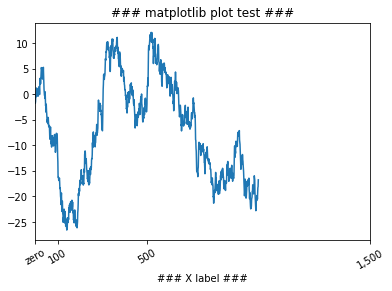

In [15]:
np.random.seed(100)

# オブジェクト指向の設定
fig, ax = plt.subplots(1, 1)
ax.plot(np.random.randn(1000).cumsum())

props = {
    "title": "### matplotlib plot test ###",
    "xlabel": "### X label ###",
    "xlim": [0, 1500],
    "xticks": [0, 100, 500, 1500],
    "xticklabels": ["zero", "100", "500", "1,500"]
}

ax.set(**props)

# rotationはxticklabelsの属性なので、別途、設定してやる必要がある。
xticklabels_props = {"rotation": 30}
plt.setp(ax.get_xticklabels(), **xticklabels_props)

p289
- 凡例を追加するには、サブプロットにlabelを指定して、__`legend()`__を呼び出す。

p290
- legendメソッドの__`loc`__で凡例を表示する位置を指定できる。（デフォルトは __best__）

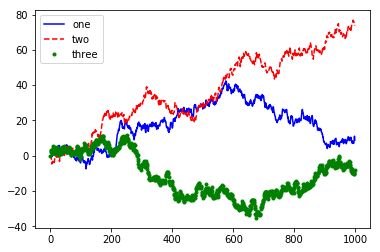

In [16]:
fig = plt.figure(); 
ax = fig.add_subplot(1, 1, 1)

ax.plot(np.random.randn(1000).cumsum(), 'b', label='one') 
ax.plot(np.random.randn(1000).cumsum(), 'r--', label='two') 
ax.plot(np.random.randn(1000).cumsum(), 'g.', label='three') 

ax.legend()

# この書き方でもOK
# plt.legend()

### サブプロットへの注釈や描画

p290m
- 独自の注釈をプロットしたい場合は、__`text`__ , __`arrow`__ , __`annotate`__ 等が使える。
- 

Text(660,10,'# label #')

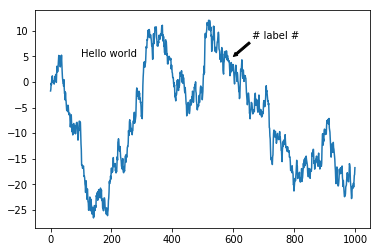

In [17]:
np.random.seed(100)

# オブジェクト指向の設定
fig, ax = plt.subplots(1, 1)
ax.plot(np.random.randn(1000).cumsum())

# (x,y)= (100, 5)の位置にテキスト追加
ax.text(100, 5, "Hello world", fontsize=10)

ax.annotate("# label #",
    xy=(600, 5),
    xytext=(660,10),
    arrowprops=dict(facecolor='black', headwidth=4, width=2, headlength=4),
    horizontalalignment='left',
    verticalalignment='top')

矢印の挿入位置（矢印の指し方は、テキスト位置との相対関係で決まるっぽい）
>xy=(600, 5),

テキストの挿入位置  
>xytext=(660,10),

p290
- Matplotlibのfont_ manager を使うと利用可能なフォントのリストが得られる。

In [18]:
import matplotlib.font_manager as fm 
fm.findSystemFonts()[:5]

['/Library/Fonts/Luminari.ttf',
 '/Library/Fonts/Krungthep.ttf',
 '/System/Library/Fonts/SFNSTextCondensed-Semibold.otf',
 '/System/Library/Fonts/SFCompactDisplay-Light.otf',
 '/Library/Fonts/Brush Script.ttf']

p292
- パッチと呼ばれる代表的な図形はmatplotlib.pyplotに含まれている。
- __`matplotlib.patches`__に完全な図形セットがある。
- __`ax.add_patch() `__で、パッチオブジェクトを描画できる。

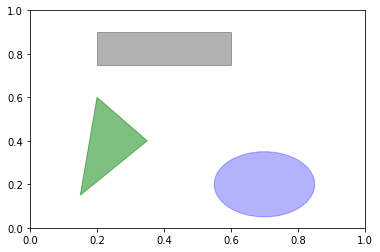

In [19]:
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)

# 長方形
rect = plt.Rectangle((0.2, 0.75), 0.4, 0.15, color='k', alpha=0.3)

# 円
circ = plt.Circle((0.7, 0.2), 0.15, color='b', alpha=0.3)

# 楕円
pgon = plt.Polygon([[0.15, 0.15], [0.35, 0.4], [0.2, 0.6]],
                   color='g',
                   alpha=0.5)

# パッチを表示
ax.add_patch(rect)
ax.add_patch(circ)
ax.add_patch(pgon)

### プロットのファイルへの保存
- __`plt.savefig`__で画像をファイルに保存できる。
> 例）jpeg形式で保存する場合
> plt.savefig("aaa.jpeg", dpi=400, bbox_inches="tight)

- 拡張子からファイル形式を推測し、保存される。
- __`dpi`__ で１インチ（2.54cm）あたりの解像度をドット数で指定できる。
- __`bbox_inches`__ で図の周りの空白を最小化できる。
- __`savefig`__は、ファイル系のオブジェクトを書き出す事も可能。

### Matplotlibの設定

p294
- デフォルトの振る舞いを変更するには__`rc`__メソッドを使う。
- 第１引数でカスタマイズしたいコンポーネント（figure, axes等）を指定する。
- キーワード引数でパラメータに設定したい値を指定していく。
- 大規模にカスタマイズしたい場合は、matplotlib/mpl-data ディレクトリ内の matplotlibrcファイルで設定する。

Text(100,5,'Hello world')

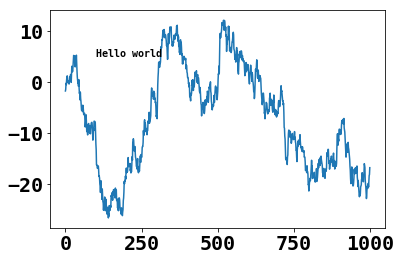

In [20]:
font_options = {'family': 'monospace', 'weight': 'bold', 'size': '20'}
plt.rc('font', **font_options)

np.random.seed(100)

# オブジェクト指向の設定
fig, ax = plt.subplots(1, 1)
ax.plot(np.random.randn(1000).cumsum())

# (x,y)= (100, 5)の位置にテキスト追加
ax.text(100, 5, "Hello world", fontsize=10)

In [21]:
import matplotlib; 

# matplotlibrc ファイルの場所が得られる。
matplotlib.matplotlib_fname() 


'/Users/ikeday/.pyenv/versions/anaconda3-5.1.0/lib/python3.6/site-packages/matplotlib/mpl-data/matplotlibrc'

## pandasとseabornのプロット関数

p295
- pandasでは、データフレームやシリーズのオブジェクトから簡単に可視化できるようにする標準メソッドがある。
- seabornをインポートすると、Matplotlibのデフォルトのカラースキームやプロットスタイルが変わり、プロットがより見やすく、より美しくなる。   
(Matplotlibのプロットの見た目を改善する目的で、seabornをインポートのもアリ。）

### 折れ線グラフ

p295
- __plot()__ のデフォルトは__折れ線グラフ__。

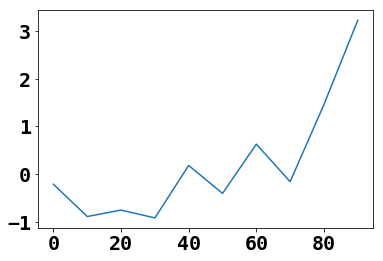

In [22]:
s = pd.Series(np.random.randn(10).cumsum(), index=np.arange(0, 100, 10))
s.plot()

p296
- シリーズ（Series）オブジェクトのインデックスがX軸としてプロットされる。
- __'use_index=False`__を渡すことでX軸にシリーズのインデックスが使用される事を無効化できる。
- X軸の目盛りと範囲は、__`xticks`__ オプション と __`xlim`__ オプションで調節できる。（Y軸も同様）
- [Series.plotメソッドの引数](https://pandas.pydata.org/pandas-docs/version/0.23.4/generated/pandas.Series.plot.html#pandas.Series.plot)
- __ax__パラメータで、Matplotlibのサブプロットオブジェクトを指定できる。
- pandasの __plot__ 属性はMatplotlibの様々な描画ファミリーを含む（例：df.plot.line()）

p298  
Series.plotメソッドの主要な引数
- __label__　　　プロットの凡例に表示するラベル。
- __ax__ 　　　　プロットするMatplotlibのサブプロットオブジェクト。何も指定しなければ、アクティブなサブプロットを使う。
- __style__ 　　　Matplotlibに渡される、'ko--'などの線種指定文字列。
- __alpha__ 　　　プロットの不透明度（0から1までの値を指定。0が完全に透明、1が完全に不透明）。
- __kind__　　　　'area'、'bar'、'barh'、'density'、'hist'、'kde'、'line'、'pie'のいずれかを指定できる。
- __logy__　　　　Y軸にログスケールを使う。
- __use_index__　目盛りのラベルにオブジェクトのインデックスを使う。
- __rot__　　　　目盛りのラベルの回転角（0から360までの値を指定）。
- __xticks__　　　X軸の目盛りに使う値。
- __yticks__　　　Y軸の目盛りに使う値。
- __xlim__　　　　X軸の範囲（例えば[0, 10]）。
- __ylim__　　　　Y軸の範囲。
- __grid__　　　　軸のグリッドを表示する（デフォルトで有効）。

p298
- データフレームには、全ての列を1つのサブプロットにプロットする事が可能。
- データフレームには、全ての列を別々のサブプロットを作成する事が可能。
- データフレームには、列の取り扱い方に自由度を与えるオプションが多数ある。

データフレームのplotのみに指定できる主要な引数
- __subplots__　　　データフレームの各列を別々のサブプロットにプロットする。
- __sharex__ 　　　　subplots=Trueの場合、サブプロット間でX軸を共有し、X軸の目盛りや範囲を関連付ける。
- __sharey__ 　　　　subplots=Trueの場合、サブプロット間でY軸を共有する。
- __figsize__ 　　　作成するFigureのサイズ。2つの数値からなるタプルで指定する＊1。
- __title__　　　　　プロットのタイトル。文字列で指定する。
- __legend__　　　　サブプロットに凡例を付ける（デフォルトではTrue）。
- __sort_columns__ 　列をアルファベット順でプロットする。デフォルトではデータフレームの列と同じ順でプロットする。


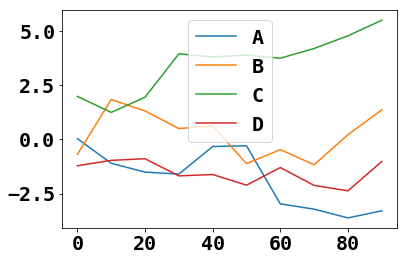

In [23]:
df = pd.DataFrame(
    np.random.randn(10, 4).cumsum(0),
    columns=['A', 'B', 'C', 'D'],
    index=np.arange(0, 100, 10))

# df.plot.line と等価
df.plot()

### 棒グラフ

p298
- __`plot.bar()`__ と __`plot.barh()`__ を使うと、それぞれ縦棒と横棒の棒グラフを描ける。
- 、シリーズやデータフレームのインデックスは、X軸（bar）やY軸（barh）の目盛りとして使われる。

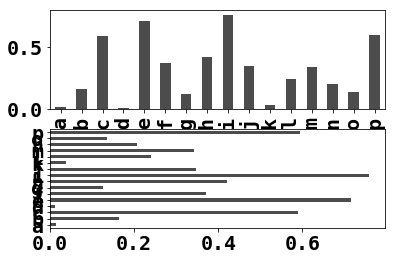

In [24]:
# 2行1列の描画領域を作成
fig, axes = plt.subplots(2, 1)

data = pd.Series(np.random.rand(16), index=list('abcdefghijklmnop'))

# color='k'で、プロットの色を黒
# とalpha=0.7 で、半透明な塗りつぶし

# 縦棒グラフ
data.plot.bar(ax=axes[0], color='k', alpha=0.7)

# 横棒グラフ
data.plot.barh(ax=axes[1], color='k', alpha=0.7)

p299
- データフレームから棒グラフを描いた場合、X軸の目盛りはデフォルトで行ラベルとなる。
- 各行の値は値棒のグループとしてまとめて並べられる。

In [25]:
df = pd.DataFrame(
    np.random.rand(6, 4),
    index=['one', 'two', 'three', 'four', 'five', 'six'],
    columns=pd.Index(['A', 'B', 'C', 'D'], name='Genus'))
df

Genus,A,B,C,D
one,0.121086,0.838816,0.512612,0.758625
two,0.384472,0.056271,0.097510,0.431788
three,0.793885,0.094134,0.160930,0.957198
four,0.838889,0.839811,0.102959,0.685641
five,0.097853,0.444321,0.964092,0.575614
six,0.455848,0.430290,0.405668,0.946360


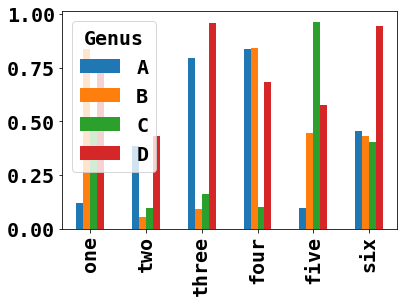

In [26]:
# 横軸は行ラベル。
df.plot.bar()

p300
- __`stacked`__を使うと積み上げ棒グラフになる。
- 棒グラフは、__`value_counts`__で集計した頻度に可視化に有効。

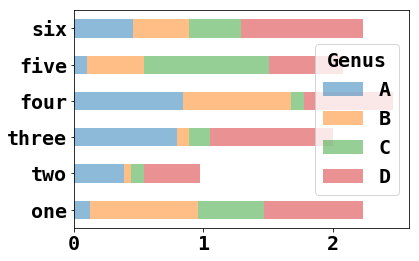

In [27]:
# 積み上げ横棒グラフ
df.plot.barh(stacked=True, alpha=0.5)

In [28]:
tips = pd.read_csv('examples/tips.csv')
tips.head()

,total_bill,tip,smoker,day,time,size
0,16.99,1.01,No,Sun,Dinner,2
1,10.34,1.66,No,Sun,Dinner,3
2,21.01,3.50,No,Sun,Dinner,3
3,23.68,3.31,No,Sun,Dinner,2
4,24.59,3.61,No,Sun,Dinner,4


In [29]:
# 曜日 (day) と団体の人数 (size) でクロス集計
party_counts = pd.crosstab(tips['day'], tips['size'])
party_counts.head()

size,1,2,3,4,5,6
day,,,,,,
Fri,1,16,1,1,0,0
Sat,2,53,18,13,1,0
Sun,0,39,15,18,3,1
Thur,1,48,4,5,1,3


In [30]:
# Not many 1- and 6-person parties
party_counts = party_counts.loc[:, 2:5]

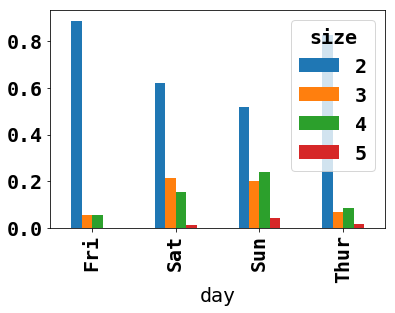

In [31]:
#  Normalize to sum to 1
party_pcts = party_counts.div(party_counts.sum(1), axis=0)
party_pcts
party_pcts.plot.bar()

p302
- __seaborn__を使用すると棒グラフもシンプルに表現される。

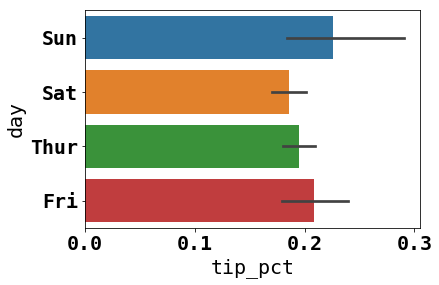

In [32]:
import seaborn as sns

tips['tip_pct'] = tips['tip'] / (tips['total_bill'] - tips['tip'])
sns.barplot(x='tip_pct', y='day', data=tips, orient='h')

p303
- <font color=red><b>hueオプションを使用するとカテゴリ毎に集計できる</b></font>
- __`seaborn.set`__を用いると、プロットの見た目を別のものに変えることができる。

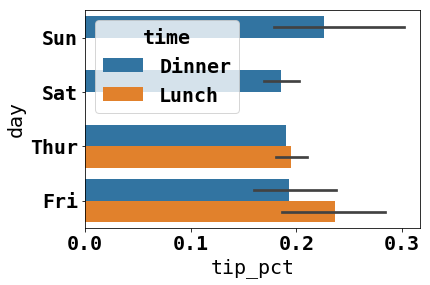

In [33]:
sns.barplot(x='tip_pct', y='day', hue='time', data=tips, orient='h')

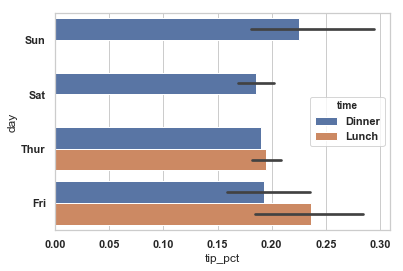

In [34]:
# プロットの見た目を変える
sns.set(style="whitegrid")

sns.barplot(x='tip_pct', y='day', hue='time', data=tips, orient='h')

In [35]:
# スタイルを元に戻す
sns.set()

### ヒストグラムと密度プロット

p304
- ヒストグラムは __`plot.histメソッド`__

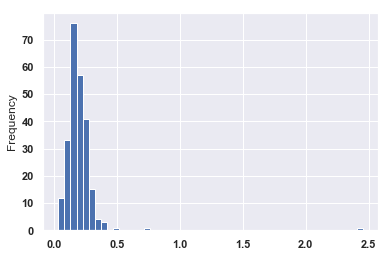

In [36]:
# tip_pct列の値の度数分布を描画
tips['tip_pct'].plot.hist(bins=50)

p305
- __`plot.density()`__で密度プロットが描画される。
- 密度プロットは、実際に観測されたデータを元に推定される連続確率分布をプロットする。
- 密度プロットは通常は、__`カーネル`__という正規分布などのシンプルな分布の和として近似するという方法が取られる。
- 密度プロットはカーネル密度推定（KDE）プロットとも呼ばれます。
- __`plot.kde`__を使うと、一般的な混合正規分布カーネル密度推定を用いた密度プロットを作成できる。

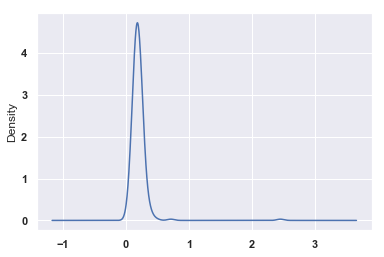

In [37]:
# 密度プロット
tips['tip_pct'].plot.density()

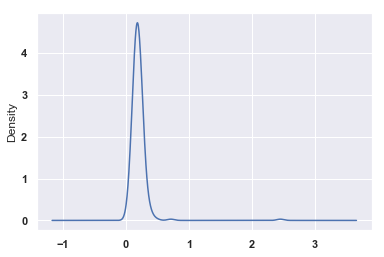

In [38]:
# plot.density()と同じ
tips['tip_pct'].plot.kde()

p306
- __`distplot`__でヒストグラムと密度プロットを同時に描画できる。

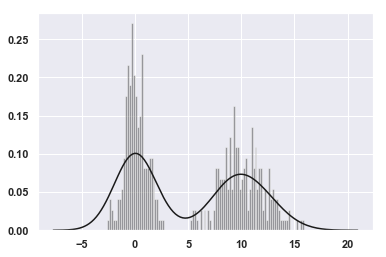

In [39]:
comp1 = np.random.normal(0, 1, size=200)
comp2 = np.random.normal(10, 2, size=200)
values = pd.Series(np.concatenate([comp1, comp2]))
sns.distplot(values, bins=100, color='k')

### 散布図

p307
- seabornの__`regplotメソッド`__は、散布図と、線形回帰による回帰直線を描画する。

Text(0.5,1,'Changes in log m1 versus log unemp')

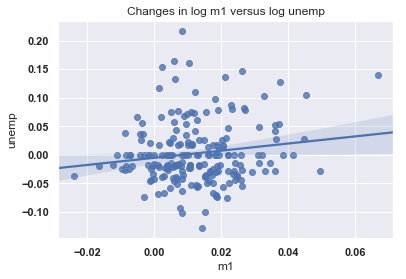

In [40]:
macro = pd.read_csv('examples/macrodata.csv')
data = macro[['cpi', 'm1', 'tbilrate', 'unemp']]
trans_data = np.log(data).diff().dropna()

# 散布図と回帰直線を描画
sns.regplot('m1', 'unemp', data=trans_data)
plt.title('Changes in log %s versus log %s' % ('m1', 'unemp'))

p306
- seabornの__`pairplot`__を使用すれば、全ての変数同士の散布図が一括で描画される。
- 同じ変数同士は密度推定が描画される。

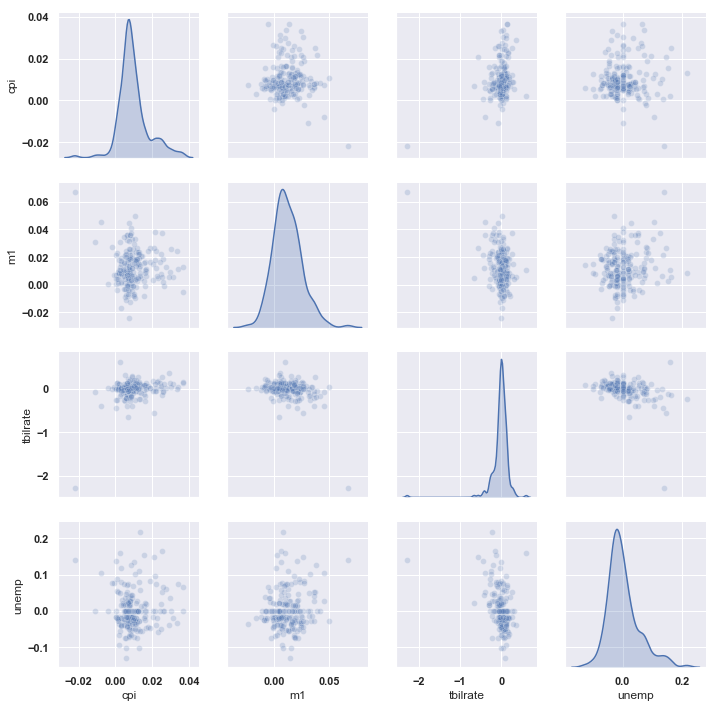

In [41]:
sns.pairplot(trans_data, diag_kind='kde', plot_kws={'alpha': 0.2})

### ファセットグリッドとカテゴリ型データ

p309
- カテゴリ型データを様々な角度から可視化するには__`factorplo`__が便利。

In [42]:
tips.head()

,total_bill,tip,smoker,day,time,size,tip_pct
0,16.99,1.01,No,Sun,Dinner,2,0.063204
1,10.34,1.66,No,Sun,Dinner,3,0.191244
2,21.01,3.50,No,Sun,Dinner,3,0.199886
3,23.68,3.31,No,Sun,Dinner,2,0.162494
4,24.59,3.61,No,Sun,Dinner,4,0.172069


/Users/ikeday/.pyenv/versions/anaconda3-5.1.0/lib/python3.6/site-packages/seaborn/categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


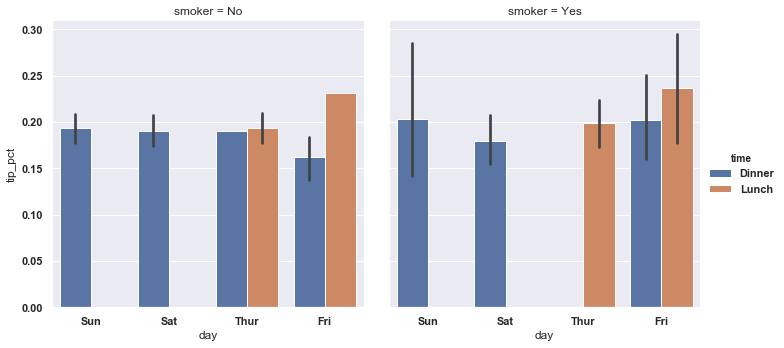

In [43]:
# 「smoker = No」と「smoker = Yes」毎にプロット
sns.factorplot(
    x='day',
    y='tip_pct',
    hue='time',
    col='smoker',
    kind='bar',
    data=tips[tips.tip_pct < 1])

p311
- factorplotはで中央値や四分位点、外れ値を表示する箱ひげ図が描画できる。

/Users/ikeday/.pyenv/versions/anaconda3-5.1.0/lib/python3.6/site-packages/seaborn/categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


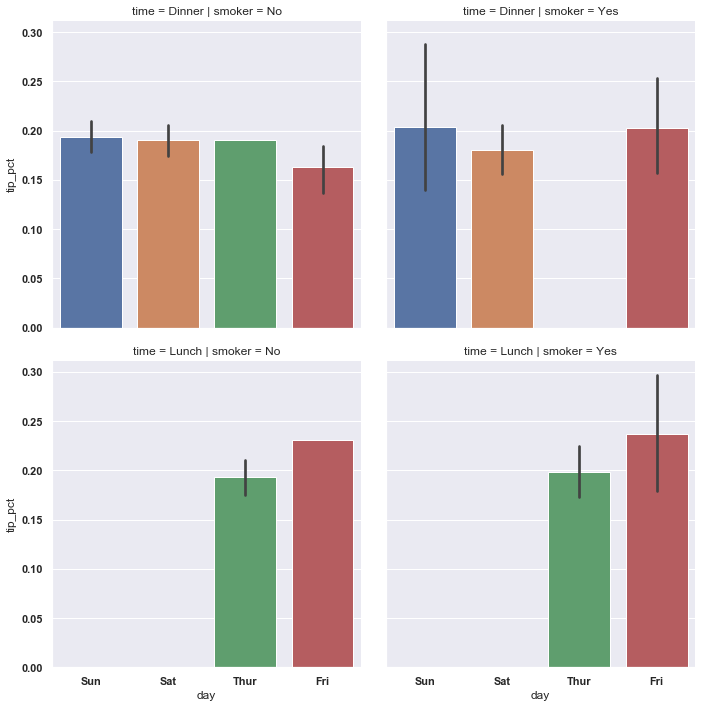

In [44]:
# time と smoker の種類分だけ描画 
sns.factorplot(
    x='day',
    y='tip_pct',
    row='time',
    col='smoker',
    kind='bar',
    data=tips[tips.tip_pct < 1])

/Users/ikeday/.pyenv/versions/anaconda3-5.1.0/lib/python3.6/site-packages/seaborn/categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


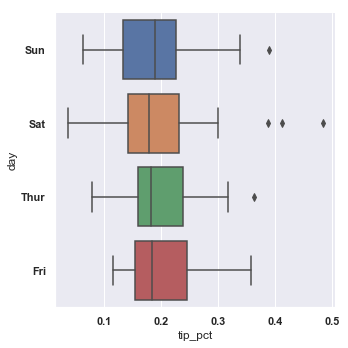

In [45]:
# kind = box でや四分位点
sns.factorplot(x='tip_pct', y='day', kind='box', data=tips[tips.tip_pct < 0.5])

## その他のPython用可視化ツール

p312
- PlotlyやBokeh等が有名。
- まず、Matplotlibを使い、必要に応じてpandasやseaborn を使うのがお勧め。